### INSTALLATION AND SETUP

In [1]:
pip install numpy # type: ignore

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


In [2]:
pip install pandas # type: ignore

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


In [3]:
pip install matplotlib # type: ignore

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


#### IMPORTING LIBRARIES

In [4]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore

#### LOADING AND EXPLORING DATA

In [18]:
df=pd.read_csv("geospatial_geological_data_500_entries.csv")
print(df)

      Region   Latitude   Longitude  Elevation (m)    Rock Type  \
0       West  28.876757 -171.735313    8407.665470  Sedimentary   
1    Central -24.113510 -137.988411    3327.163550  Metamorphic   
2       East  85.100246   82.351161     635.887001  Metamorphic   
3    Central -66.195677  168.107903    2300.531636  Sedimentary   
4    Central -33.023112  159.474712    4656.207375  Sedimentary   
..       ...        ...         ...            ...          ...   
495    North -58.023480  133.053298    7564.156793      Igneous   
496     East  36.001756  -32.713754    3537.115535  Metamorphic   
497    North  19.894278 -171.805841    8668.562188      Igneous   
498    North -47.363460  150.346976    8575.555706  Sedimentary   
499     West  63.355240   62.834869    7634.937038      Igneous   

                             Soil Composition  Earthquake Frequency  \
0    Clay: 29.40%, Sand: 16.83%, Silt: 53.77%                     3   
1    Clay: 37.83%, Sand: 11.66%, Silt: 50.50%        

#### Data Cleaning and Manipulation:

In [19]:
# Checking Null Values In Data
print(df.isnull().sum())
# Categorization of data..
df['Rock Type'] = df['Rock Type'].astype('category')

Region                      0
Latitude                    0
Longitude                   0
Elevation (m)               0
Rock Type                   0
Soil Composition            0
Earthquake Frequency        0
Average Temperature (°C)    0
dtype: int64


The DataSet do not have any null value so no need to clarify the null values.

#### Visualizing Earthquake Patterns

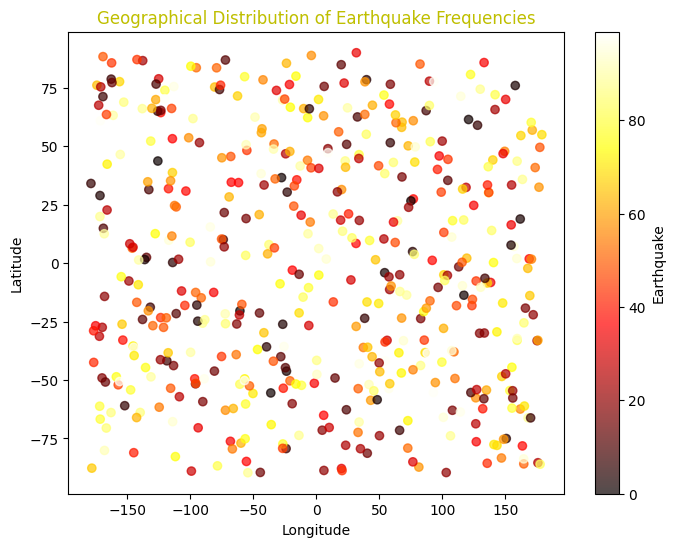

In [43]:
x=df["Longitude"]
y=df["Latitude"]
plt.figure(figsize=(8, 6))
plt.scatter(df['Longitude'], df['Latitude'],
            c=df['Earthquake Frequency'], cmap='hot', alpha=0.7)
plt.colorbar(label='Earthquake')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Earthquake Frequencies',color="y")
plt.show()

#### Rock Type Distribution Analysis

C:\Users\pc\AppData\Local\Temp\ipykernel_4312\3130918962.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rock_distribution = df.groupby(['Region', 'Rock Type']).size().unstack()


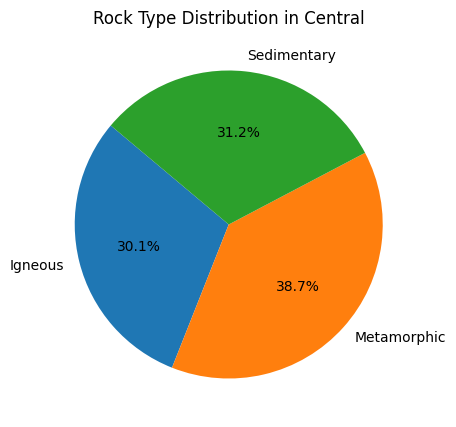

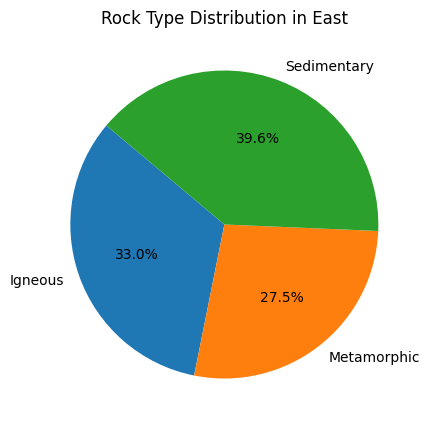

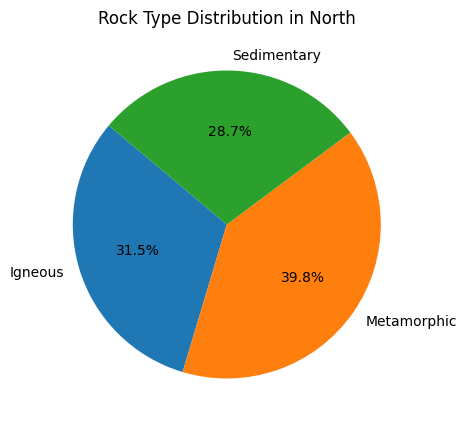

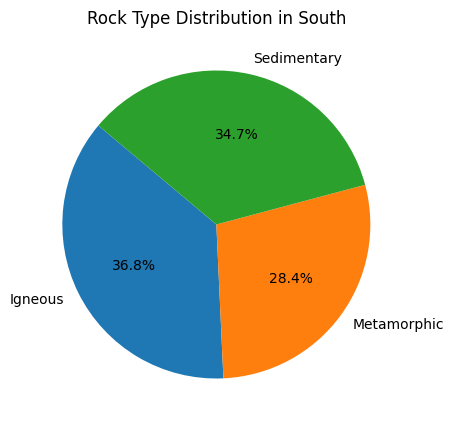

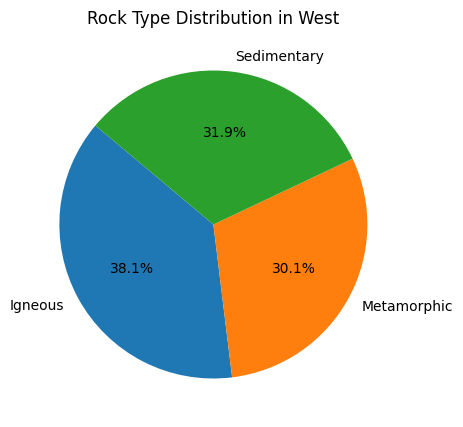

In [22]:
# Group by Region and Rock Type
rock_distribution = df.groupby(['Region', 'Rock Type']).size().unstack()

# Plot pie charts for each region
for region in rock_distribution.index:
    plt.figure(figsize=(5, 5))
    rock_distribution.loc[region].plot(kind='pie', autopct='%1.1f%%', startangle=140)
    plt.title(f'Rock Type Distribution in {region}')
    plt.ylabel('')
    plt.show()


#### Elevation and Temperature Relationship

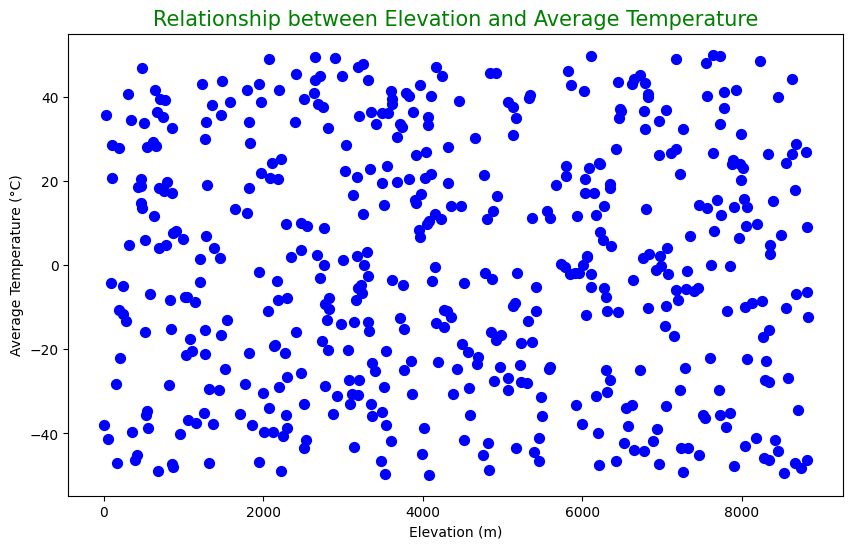

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Elevation (m)'], df['Average Temperature (°C)'], c='blue', s=50)
plt.xlabel('Elevation (m)')
plt.ylabel('Average Temperature (°C)')
plt.title('Relationship between Elevation and Average Temperature',fontdict={'size':15,'color':"green"})
plt.show()


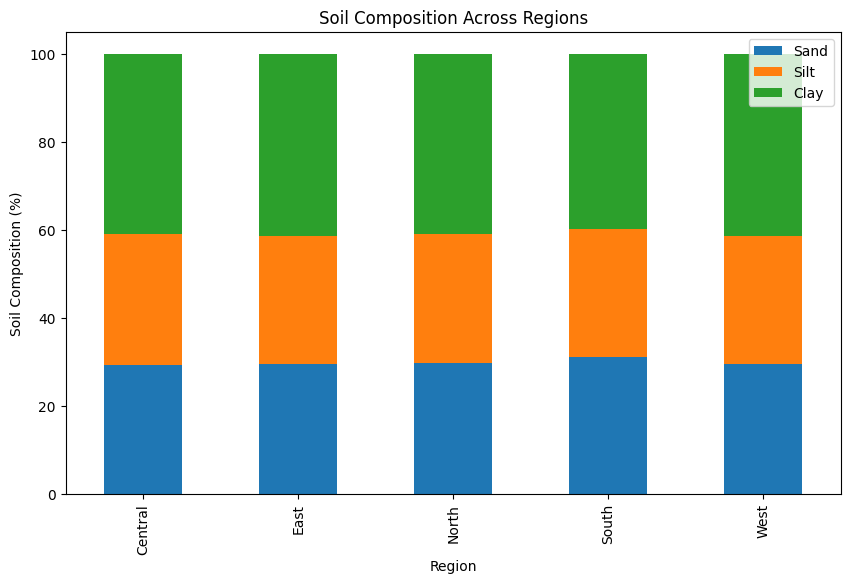

In [37]:

x= df["Region"],
y=df["Soil Composition"]

soil_composition_split = y.str.split(',', expand=True)

sand = []
silt = []
clay = []

for i in range(len(soil_composition_split)):
    sand.append(float(soil_composition_split[0][i].split()[1].replace('%', '')))
    silt.append(float(soil_composition_split[1][i].split()[1].replace('%', '')))
    clay.append(float(soil_composition_split[2][i].split()[1].replace('%', '')))


composition_df = pd.DataFrame({
    'Region': df['Region'],
    'Sand': sand,
    'Silt': silt,
    'Clay': clay
})
soil_composition_by_region = composition_df.groupby('Region').mean()

soil_composition_by_region.plot(kind='bar',stacked=True, figsize=(10, 6))
plt.title('Soil Composition Across Regions')
plt.xlabel('Region')
plt.ylabel('Soil Composition (%)')
plt.show()


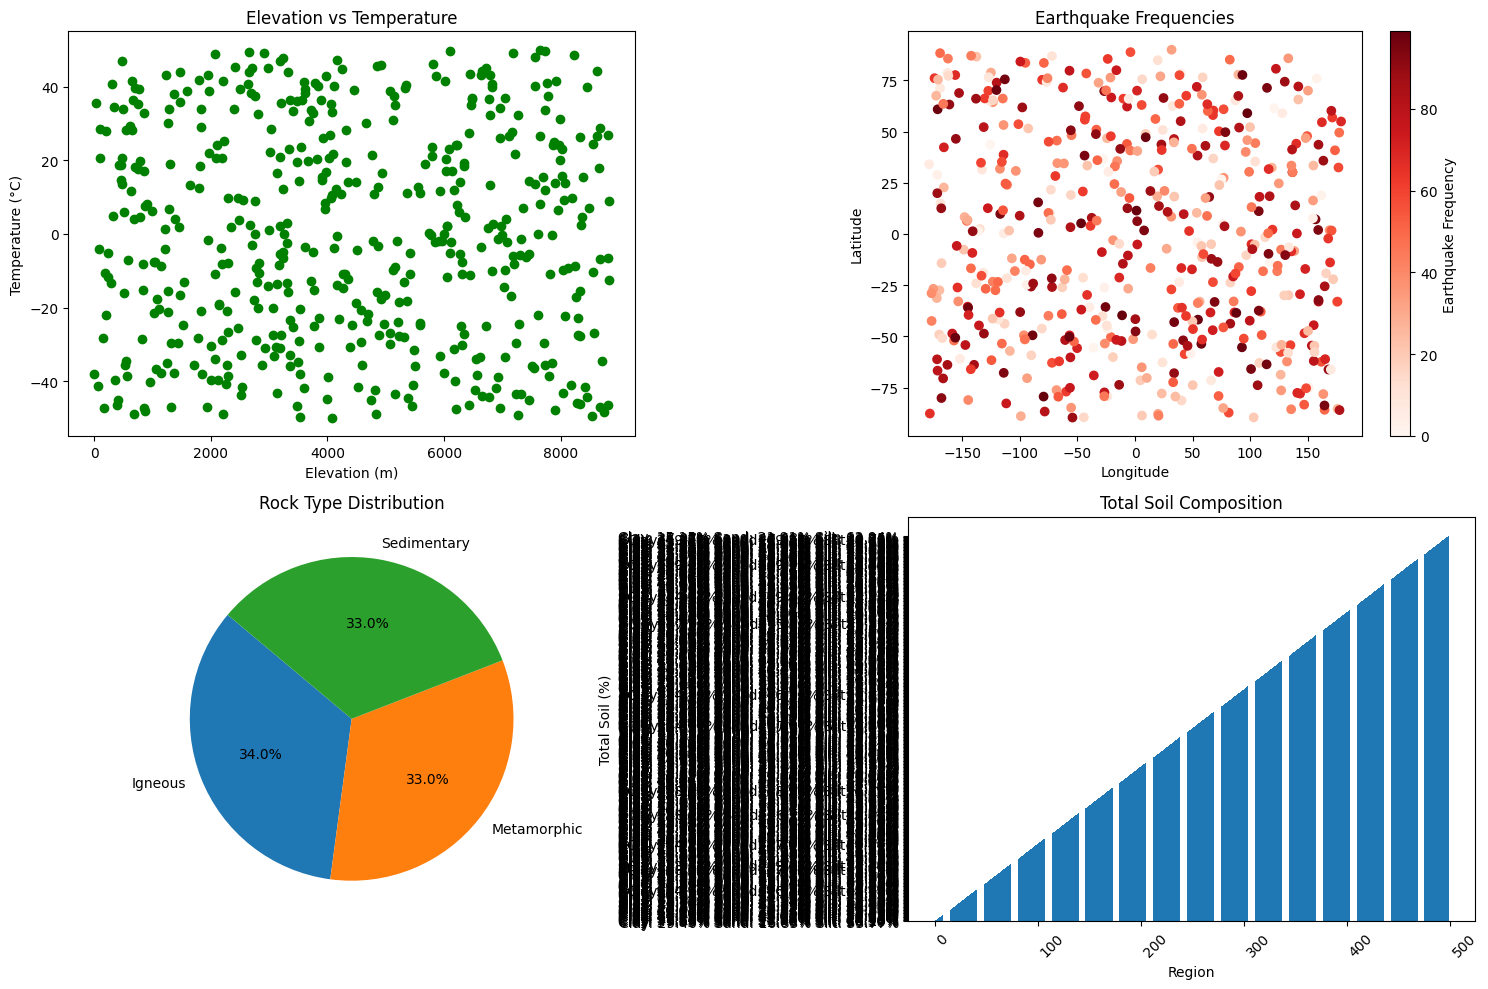

In [46]:
plt.figure(figsize=(15, 10))

# Elevation vs Temperature
plt.subplot(2, 2, 1)
plt.scatter(df['Elevation (m)'], df['Average Temperature (°C)'], c='green')
plt.title('Elevation vs Temperature')
plt.xlabel('Elevation (m)')
plt.ylabel('Temperature (°C)')

# Earthquake Frequencies
plt.subplot(2, 2, 2)
plt.scatter(df['Longitude'], df['Latitude'], c=df['Earthquake Frequency'], cmap='Reds')
plt.title('Earthquake Frequencies')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Earthquake Frequency')

# Rock Type Distribution
plt.subplot(2, 2, 3)
rock_distribution = df['Rock Type'].value_counts()
plt.pie(rock_distribution, labels=rock_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Rock Type Distribution')

# Soil Composition
plt.subplot(2, 2, 4)
plt.bar(soil_composition.index, soil_composition.sum(axis=1)) # type: ignore
plt.title('Total Soil Composition')
plt.xlabel('Region')
plt.ylabel('Total Soil (%)')
plt.xticks(rotation=45, ha='left')

plt.tight_layout()
plt.show()